<a href="https://colab.research.google.com/github/DimitryMo/NSD/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
import nltk
#nltk.download()

In [49]:
import sys
import csv
csv.field_size_limit(sys.maxsize)

9223372036854775807

In [50]:
data = pd.read_csv("allhabr.csv", delimiter=',', engine='python', encoding='utf-8', error_bad_lines=False)

In [92]:
filik = data
filik

,Unnamed: 0,title,text,date,hubs,tags,votes,views,bookmarks,comments
0,0,Психологическая обусловленность возникновения ...,Видимо вспышки на солнце в том числе послуж...,2014-01,Разработка веб-сайтов,Web 3.0 психология социальные сети носимая эле...,-3.0,6600.0,10.0,"Думаю, всем нам известно, что это будут за час..."
1,1,Обзор трафарет+блокнот для прототипирования,Некоторое время были у меня в руках предметы ...,2014-01,Интерфейсы,prototype прототип prototyping прототипировани...,35.0,38400.0,124.0,Где можно такой заказать?~#www.uistencils.com/...
2,2,Хранилище данных уровня SOHO из картона,Потребность в хранилище данных у меня возник...,2014-01,DIY или Сделай сам,diy или сделай сам хранение данных хранилище д...,-11.0,13700.0,12.0,Тему переименовать — Как собрать скворечник.\n...
3,3,Год большого рывка: краткие итоги 2013-го,год был годом новых базовых станций и н...,2014-01,Блог компании ВымпелКом (Билайн) Разработка си...,Сотовая связь сервис LTE Билайн Вымпелком 2013,20.0,14000.0,19.0,В москве и области функционал дозвона в режиме...
4,4,6 простых вопросов по C# с подвохом,Почитав простых задач на c с подвохом я ог...,2014-01,.NET,c# .net внезапно не делайте так никогда кровь ...,37.0,35800.0,204.0,"«Можно ли в C# „поковырять“ память, которую вы..."
...,...,...,...,...,...,...,...,...,...,...
49775,135946,Меню консольных команд на python,Приветствую Вас коллеги Меня зовут Рустам я...,2020-02,Python DevOps,python3 консоль,2.0,4400.0,51.0,"shell команды прописаны в конфиге, который пар..."
49776,135964,Срочные задачи. Да придёт Спаситель,Вы когда нибудь задумывались откуда берутся с...,2020-02,GTD Управление персоналом Читальный зал,черт знает что,32.0,10600.0,54.0,"TL;DR:\n«У каждой аварии есть имя, фамилия и д..."
49777,135980,"Жесты, которые радуют",Всем привет На прошлой неделе мы запустили...,2020-02,Блог компании Vivaldi Technologies AS Браузеры,vivaldi опрос жесты мышью браузер,3.0,1500.0,3.0,Сколько не хотел попробовать перейти на другой...
49778,135984,«Если сайты будут работать лучше — это будет и...,Совсем недавно вышла статья про новый инструме...,15:36-12,Блог компании JUG Ru Group Разработка веб-сайт...,heisenbug heisenbug2020piter heisenbug2020 pla...,17.0,900.0,7.0,"Если кому-то интересно, есть ли в Playwright о..."


In [93]:
filik.dropna(inplace=True)

In [94]:
dat = filik['text'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка

bignew=[]
for i in dat:
    new = []
    for j in i.split():
        new.append(j.lower())
    bignew.append(new)
filik['textlower'] = bignew



In [95]:
filik['textlowerstring'] = filik['textlower'].apply(' '.join)

In [96]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/freezylex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/freezylex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
from nltk.tokenize import word_tokenize

In [98]:
filik['texttok'] = filik.textlowerstring.apply(lambda x: word_tokenize(x))


In [99]:
nomorebadwords = []
from nltk.corpus import stopwords
stop_words = set(stopwords.words("russian"))
for j in filik['texttok']:
    smallbw = []
    for i in j:
        if i not in stop_words:
            smallbw.append(i)
    nomorebadwords.append(smallbw)
filik['textalmostdone'] = nomorebadwords

    

In [100]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


In [101]:
def lemmatize(text):    #приводим в исходную форму слово
    res = list()
    for line in text:
        res1 = list()
        for word in line:
            p = morph.parse(word)[0]
            res1.append(p.normal_form)
        res.append(res1)

    return res

filik['done'] = lemmatize(filik['textalmostdone'])


In [102]:
filik['done']

0        [видимо, вспышка, солнце, число, послужить, пр...
1        [некоторый, время, рука, предмет, интересный, ...
2        [потребность, хранилище, дать, возникнуть, дов...
3        [год, год, новый, базовый, станция, новый, сер...
4        [почитать, простой, задача, c, подвох, огорчит...
                               ...                        
49775    [приветствовать, коллега, звать, рустам, работ...
49776    [задумываться, откуда, браться, срочный, задач...
49777    [весь, привет, прошлый, неделя, запустить, опр...
49778    [недавно, выйти, статья, новый, инструмент, pl...
49779    [продолжать, серия, стать, начаться, обзор, ре...
Name: done, Length: 44473, dtype: object

In [103]:
from gensim.corpora.dictionary import Dictionary

In [104]:
dictionary = Dictionary(filik['done'])

In [105]:
corpus = [dictionary.doc2bow(article) for article in filik['done']]

In [106]:
import collections
import itertools

total_word_count = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [107]:
import collections
import itertools
l = []
for doc in corpus:
    bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
    l1 = []
    for word_id, word_count in bow_doc:
        l1.append((dictionary.get(word_id), word_count))
    l.append(l1)
filik['countwords'] = l
filik

,Unnamed: 0,title,text,date,hubs,tags,votes,views,bookmarks,comments,textlower,textlowerstring,texttok,textalmostdone,done,countwords
0,0,Психологическая обусловленность возникновения ...,Видимо вспышки на солнце в том числе послуж...,2014-01,Разработка веб-сайтов,Web 3.0 психология социальные сети носимая эле...,-3.0,6600.0,10.0,"Думаю, всем нам известно, что это будут за час...","[видимо, вспышки, на, солнце, в, том, числе, п...",видимо вспышки на солнце в том числе послужили...,"[видимо, вспышки, на, солнце, в, том, числе, п...","[видимо, вспышки, солнце, числе, послужили, пр...","[видимо, вспышка, солнце, число, послужить, пр...","[(человек, 24), (это, 17), (потребность, 13), ..."
1,1,Обзор трафарет+блокнот для прототипирования,Некоторое время были у меня в руках предметы ...,2014-01,Интерфейсы,prototype прототип prototyping прототипировани...,35.0,38400.0,124.0,Где можно такой заказать?~#www.uistencils.com/...,"[некоторое, время, были, у, меня, в, руках, пр...",некоторое время были у меня в руках предметы и...,"[некоторое, время, были, у, меня, в, руках, пр...","[некоторое, время, руках, предметы, интересные...","[некоторый, время, рука, предмет, интересный, ...","[(трафарет, 16), (блокнот, 9), (программа, 5),..."
2,2,Хранилище данных уровня SOHO из картона,Потребность в хранилище данных у меня возник...,2014-01,DIY или Сделай сам,diy или сделай сам хранение данных хранилище д...,-11.0,13700.0,12.0,Тему переименовать — Как собрать скворечник.\n...,"[потребность, в, хранилище, данных, у, меня, в...",потребность в хранилище данных у меня возникла...,"[потребность, в, хранилище, данных, у, меня, в...","[потребность, хранилище, данных, возникла, дов...","[потребность, хранилище, дать, возникнуть, дов...","[(хранилище, 8), (диск, 7), (довольно, 7), (сд..."
3,3,Год большого рывка: краткие итоги 2013-го,год был годом новых базовых станций и н...,2014-01,Блог компании ВымпелКом (Билайн) Разработка си...,Сотовая связь сервис LTE Билайн Вымпелком 2013,20.0,14000.0,19.0,В москве и области функционал дозвона в режиме...,"[год, был, годом, новых, базовых, станций, и, ...",год был годом новых базовых станций и новых се...,"[год, был, годом, новых, базовых, станций, и, ...","[год, годом, новых, базовых, станций, новых, с...","[год, год, новый, базовый, станция, новый, сер...","[(год, 15), (сеть, 14), (большой, 6), (один, 6..."
4,4,6 простых вопросов по C# с подвохом,Почитав простых задач на c с подвохом я ог...,2014-01,.NET,c# .net внезапно не делайте так никогда кровь ...,37.0,35800.0,204.0,"«Можно ли в C# „поковырять“ память, которую вы...","[почитав, простых, задач, на, c, с, подвохом, ...",почитав простых задач на c с подвохом я огорчи...,"[почитав, простых, задач, на, c, с, подвохом, ...","[почитав, простых, задач, c, подвохом, огорчил...","[почитать, простой, задача, c, подвох, огорчит...","[(f, 25), (static, 23), (color, 22), (mov, 20)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49775,135946,Меню консольных команд на python,Приветствую Вас коллеги Меня зовут Рустам я...,2020-02,Python DevOps,python3 консоль,2.0,4400.0,51.0,"shell команды прописаны в конфиге, который пар...","[приветствую, вас, коллеги, меня, зовут, руста...",приветствую вас коллеги меня зовут рустам я ра...,"[приветствую, вас, коллеги, меня, зовут, руста...","[приветствую, коллеги, зовут, рустам, работаю,...","[приветствовать, коллега, звать, рустам, работ...","[(пункт, 6), (приложение, 5), (контейнер, 5), ..."
49776,135964,Срочные задачи. Да придёт Спаситель,Вы когда нибудь задумывались откуда берутся с...,2020-02,GTD Управление персоналом Читальный зал,черт знает что,32.0,10600.0,54.0,"TL;DR:\n«У каждой аварии есть имя, фамилия и д...","[вы, когда, нибудь, задумывались, откуда, беру...",вы когда нибудь задумывались откуда берутся ср...,"[вы, когда, нибудь, задумывались, откуда, беру...","[задумывались, откуда, берутся, срочные, задач...","[задумываться, откуда, браться, срочный, задач...","[(задача, 22), (срочный, 14), (директор, 7),

In [108]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)
tfidf_weights = tfidf[doc]
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
#for term_id, weight in sorted_tfidf_weights[:]:
#    print(dictionary.get(term_id), weight)

маска 0.5657266690972592
фильтр 0.26525005276578234
unix 0.25754296877688576
подмасочник 0.24069810314672238
наголовник 0.18513492467810141
пряжка 0.16008889959522848
ремень 0.15626704151580897
ffp 0.15427910389841787
пары 0.13891116443328216
ппм 0.1286339977420796
ассортимент 0.12588231575403103
выдох 0.1139214153101043
стекло 0.11319704081349617
защита 0.10964861056037388
неорганический 0.1090844617758856
пдк 0.10795078358139402
пыль 0.10623206098345071
органический 0.10600871960475013
цена 0.10379617818770023
силикон 0.1003725619838657
полнолицевой 0.09647549830655969
клапан 0.08806739760924735
обтюратор 0.08764391929950971
аммиак 0.08726756942070849
рубль 0.08599807962085627
степень 0.07981528351907473
переговорный 0.07431409704906418
строительный 0.06908679054062317
противоаэрозольный 0.06877088661334925
выпускаться 0.06734639793038842
кислый 0.06713116521208981
предфильтр 0.0643169988710398
плёнка 0.06349247823111008
обзор 0.061429048819877964
пара 0.05582905610297263
сорбент 0.0

In [109]:
L2=[]
for doc in corpus:
    l2=[]
    tfidf_weights = tfidf[doc]
    sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
    for term_id, weight in sorted_tfidf_weights[:]:
        l2.append((dictionary.get(term_id), weight))
    L2.append(l2)
filik['weightwords'] = L2

In [110]:
'''
#так, теперь давайте проделаем это для тэгов
df_tags=pd.DataFrame()
dat1 = filik['tags'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка

bignew1=[]
for i in dat1:
    new1 = []
    for j in i.split():
        new1.append(j.lower())
    bignew1.append(new1)
df_tags['tagslower'] = bignew1

df_tags['tagslowerstring'] = df_tags['tagslower'].apply(' '.join)

df_tags['tagstok'] = df_tags.tagslowerstring.apply(lambda x: word_tokenize(x))

nomorebadwords1 = []
from nltk.corpus import stopwords
#stop_words = set(stopwords.words("russian"))
for j in df_tags['tagstok']:
    smallbw1 = []
    for i in j:
        if i not in stop_words:
            smallbw1.append(i)
    nomorebadwords1.append(smallbw1)
df_tags['tagsalmostdone'] = nomorebadwords1

df_tags['done'] = lemmatize(df_tags['tagsalmostdone'])

dictionary1 = Dictionary(df_tags['done'])
corpus1 = [dictionary1.doc2bow(article) for article in df_tags['done']]
total_word_count1 = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus1):
    total_word_count1[word_id] += word_count

l1 = []
for doc in corpus1:
    bow_doc1 = sorted(doc, key=lambda w: w[1], reverse=True)
    l12 = []
    for word_id, word_count in bow_doc1:
        l12.append((dictionary1.get(word_id), word_count))
    l1.append(l12)
df_tags['countwords'] = l1
df_tags
'''

,tagslower,tagslowerstring,tagstok,tagsalmostdone,done,countwords
0,"[web, 3.0, психология, социальные, сети, носим...",web 3.0 психология социальные сети носимая эле...,"[web, 3.0, психология, социальные, сети, носим...","[web, 3.0, психология, социальные, сети, носим...","[web, 3.0, психология, социальный, сеть, носит...","[(3.0, 1), (web, 1), (вспышка, 1), (зависимост..."
1,"[prototype, прототип, prototyping, прототипиро...",prototype прототип prototyping прототипировани...,"[prototype, прототип, prototyping, прототипиро...","[prototype, прототип, prototyping, прототипиро...","[prototype, прототип, prototyping, прототипиро...","[(prototyping, 2), (прототипирование, 2), (pro..."
2,"[diy, или, сделай, сам, хранение, данных, хран...",diy или сделай сам хранение данных хранилище д...,"[diy, или, сделай, сам, хранение, данных, хран...","[diy, сделай, хранение, данных, хранилище, дан...","[diy, сделать, хранение, дать, хранилище, дать...","[(дать, 2), (diy, 1), (корпус, 1), (сделать, 1..."
3,"[сотовая, связь, сервис, lte, билайн, вымпелко...",сотовая связь сервис lte билайн вымпелком 2013,"[сотовая, связь, сервис, lte, билайн, вымпелко...","[сотовая, связь, сервис, lte, билайн, вымпелко...","[сотовый, связь, сервис, lte, билайн, вымпелко...","[(2013, 1), (lte, 1), (билайн, 1), (вымпелком,..."
4,"[c#, .net, внезапно, не, делайте, так, никогда...",c# .net внезапно не делайте так никогда кровь ...,"[c, #, .net, внезапно, не, делайте, так, никог...","[c, #, .net, внезапно, делайте, кровь, боль]","[c, #, .net, внезапно, делать, кровь, боль]","[(#, 1), (.net, 1), (c, 1), (боль, 1), (внезап..."
...,...,...,...,...,...,...
44468,"[python3, консоль]",python3 консоль,"[python3, консоль]","[python3, консоль]","[python3, консоль]","[(консоль, 1), (python3, 1)]"
44469,"[черт, знает, что]",черт знает что,"[черт, знает, что]","[черт, знает]","[черта, знать]","[(знать, 1), (черта, 1)]"
44470,"[vivaldi, опрос, жесты, мышью, браузер]",vivaldi опрос жесты мышью браузер,"[vivaldi, опрос, жесты, мышью, браузер]","[vivaldi, опрос, жесты, мышью, браузер]","[vivaldi, опрос, жест, мыший, браузер]","[(опрос, 1), (браузер, 1), (vivaldi, 1), (жест..."
44471,"[heisenbug, heisenbug2020piter, heisenbug2020,...",heisenbug heisenbug2020piter heisenbug2020 pla...,"[heisenbug, heisenbug2020piter, heisenbug2020,...","[heisenbug, heisenbug2020piter, heisenbug2020,...","[heisenbug, heisenbug2020piter, heisenbug2020,...","[(heisenbug, 3), (playwright, 2), (testing, 1)..."


In [111]:
'''
#теперь для хабов
df_hubs=pd.DataFrame()
dat2 = filik['hubs'] #создаем новую колонку, в которой все слова текста в нижнем регистре представлены в форме списка

bignew2=[]
for i in dat2:
    new2 = []
    for j in i.split():
        new2.append(j.lower())
    bignew2.append(new2)
df_hubs['hubslower'] = bignew2

df_hubs['hubslowerstring'] = df_hubs['hubslower'].apply(' '.join)

df_hubs['hubstok'] = df_hubs.hubslowerstring.apply(lambda x: word_tokenize(x))

nomorebadwords2 = []
from nltk.corpus import stopwords
#stop_words = set(stopwords.words("russian"))
for j in df_hubs['hubstok']:
    smallbw2 = []
    for i in j:
        if i not in stop_words:
            smallbw2.append(i)
    nomorebadwords2.append(smallbw2)
df_hubs['hubsalmostdone'] = nomorebadwords2

df_hubs['done'] = lemmatize(df_hubs['hubsalmostdone'])

dictionary2 = Dictionary(df_hubs['done'])
corpus2 = [dictionary2.doc2bow(article) for article in df_hubs['done']]
total_word_count2 = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus2):
    total_word_count2[word_id] += word_count

l2 = []
for doc in corpus2:
    bow_doc2 = sorted(doc, key=lambda w: w[1], reverse=True)
    l13 = []
    for word_id, word_count in bow_doc2:
        l13.append((dictionary2.get(word_id), word_count))
    l2.append(l13)
df_hubs['countwords'] = l2
df_hubs
'''

,hubslower,hubslowerstring,hubstok,hubsalmostdone,done,countwords
0,"[разработка, веб-сайтов]",разработка веб-сайтов,"[разработка, веб-сайтов]","[разработка, веб-сайтов]","[разработка, веб-сайт]","[(веб-сайт, 1), (разработка, 1)]"
1,[интерфейсы],интерфейсы,[интерфейсы],[интерфейсы],[интерфейс],"[(интерфейс, 1)]"
2,"[diy, или, сделай, сам]",diy или сделай сам,"[diy, или, сделай, сам]","[diy, сделай]","[diy, сделать]","[(diy, 1), (сделать, 1)]"
3,"[блог, компании, вымпелком, (билайн), разработ...",блог компании вымпелком (билайн) разработка си...,"[блог, компании, вымпелком, (, билайн, ), разр...","[блог, компании, вымпелком, (, билайн, ), разр...","[блог, компания, вымпелком, (, билайн, ), разр...","[(разработка, 1), ((, 1), (), 1), (билайн, 1),..."
4,[.net],.net,[.net],[.net],[.net],"[(.net, 1)]"
...,...,...,...,...,...,...
44468,"[python, devops]",python devops,"[python, devops]","[python, devops]","[python, devops]","[(python, 1), (devops, 1)]"
44469,"[gtd, управление, персоналом, читальный, зал]",gtd управление персоналом читальный зал,"[gtd, управление, персоналом, читальный, зал]","[gtd, управление, персоналом, читальный, зал]","[gtd, управление, персонал, читальный, зал]","[(gtd, 1), (управление, 1), (зал, 1), (читальн..."
44470,"[блог, компании, vivaldi, technologies, as, бр...",блог компании vivaldi technologies as браузеры,"[блог, компании, vivaldi, technologies, as, бр...","[блог, компании, vivaldi, technologies, as, бр...","[блог, компания, vivaldi, technologies, as, бр...","[(блог, 1), (компания, 1), (technologies, 1), ..."
44471,"[блог, компании, jug, ru, group, разработка, в...",блог компании jug ru group разработка веб-сайт...,"[блог, компании, jug, ru, group, разработка, в...","[блог, компании, jug, ru, group, разработка, в...","[блог, компания, jug, ru, group, разработка, в...","[(тестирование, 2), (веб-сайт, 1), (разработка..."


In [112]:
final = pd.DataFrame()
#final['hubsdone'] = df_hubs['done']
#final['hubscounted'] = df_hubs['countwords']
#final['tagsdone'] = df_tags['done']
#final['tagscounted'] = df_tags['countwords']
final['textdone'] = filik['done']
final['textcounted'] = filik['countwords']
final['weightwords'] = filik['weightwords']
#разобьем по годам
#list_date = []
#for date in filik['date']:
#    new_date = date.split('-')
#    date = new_date[0]
#    list_date.append(date)
#filik['date'] = list_date
final['date'] = filik['date']

In [113]:
final

,hubsdone,hubscounted,tagsdone,tagscounted,textdone,textcounted,weightwords,date
0,"[разработка, веб-сайт]","[(веб-сайт, 1), (разработка, 1)]","[web, 3.0, психология, социальный, сеть, носит...","[(3.0, 1), (web, 1), (вспышка, 1), (зависимост...","[видимо, вспышка, солнце, число, послужить, пр...","[(человек, 24), (это, 17), (потребность, 13), ...","[(психика, 0.3220140636351013), (потребность, ...",2014-01
1,[интерфейс],"[(интерфейс, 1)]","[prototype, прототип, prototyping, прототипиро...","[(prototyping, 2), (прототипирование, 2), (pro...","[некоторый, время, рука, предмет, интересный, ...","[(трафарет, 16), (блокнот, 9), (программа, 5),...","[(трафарет, 0.7565935813732), (блокнот, 0.3021...",2014-01
2,"[diy, сделать]","[(diy, 1), (сделать, 1)]","[diy, сделать, хранение, дать, хранилище, дать...","[(дать, 2), (diy, 1), (корпус, 1), (сделать, 1...","[потребность, хранилище, дать, возникнуть, дов...","[(хранилище, 8), (диск, 7), (довольно, 7), (сд...","[(двп, 0.5401016423890727), (хранилище, 0.2773...",2014-01
3,"[блог, компания, вымпелком, (, билайн, ), разр...","[(разработка, 1), ((, 1), (), 1), (билайн, 1),...","[сотовый, связь, сервис, lte, билайн, вымпелко...","[(2013, 1), (lte, 1), (билайн, 1), (вымпелком,...","[год, год, новый, базовый, станция, новый, сер...","[(год, 15), (сеть, 14), (большой, 6), (один, 6...","[(lte, 0.3400347745181987), (абонент, 0.246965...",2014-01
4,[.net],"[(.net, 1)]","[c, #, .net, внезапно, делать, кровь, боль]","[(#, 1), (.net, 1), (c, 1), (боль, 1), (внезап...","[почитать, простой, задача, c, подвох, огорчит...","[(f, 25), (static, 23), (color, 22), (mov, 20)...","[(ebp, 0.3054363557114085), (mov, 0.2716882192...",2014-01
...,...,...,...,...,...,...,...,...
44468,"[python, devops]","[(python, 1), (devops, 1)]","[python3, консоль]","[(консоль, 1), (python3, 1)]","[получить, комментарий, последний, статья, реш...","[(бактерия, 29), (исследование, 25), (микробио...","[(микробиота, 0.49590665266813916), (бактерия,...",2019-07
44469,"[gtd, управление, персонал, читальный, зал]","[(gtd, 1), (управление, 1), (зал, 1), (читальн...","[черта, знать]","[(знать, 1), (черта, 1)]","[запустить, jetbrains, marketplace, новый, пла...","[(плагин, 27), (jetbrains, 18), (java, 9), (ma...","[(jetbrains, 0.470152476540144), (плагин, 0.42...",2019-07
44470,"[блог, компания, vivaldi, technologies, as, бр...","[(блог, 1), (компания, 1), (technologies, 1), ...","[vivaldi, опрос, жест, мыший, браузер]","[(опрос, 1), (браузер, 1), (vivaldi, 1), (жест...","[год, frontend, разработчик, писать, монолит, ...","[(микроприложение, 26), (сторона, 25), (прилож...","[(микроприложение, 0.695130793483877), (microa...",2019-07
44471,"[блог, компания, jug, ru, group, разработка, в...","[(тестирование, 2), (веб-сайт, 1), (разработка...","[heisenbug, heisenbug2020piter, heisenbug2020,...","[(heisenbug, 3), (playwright, 2), (testing, 1)...","[привет, хабра, продолжать, разговор, механик,...","[(навык, 54), (древо, 54), (система, 20), (лоя...","[(древо, 0.8089515757215779), (навык, 0.355178...",2019-07


In [114]:
checklist = ['финансы','инвестиция', 'фонд', 'HFT', 'фьючерс', 'опцион', 'биржа', 'форекс', 'forex', 'брокер', 'финтех', 'fintech', 'листинг', 'котировка', 'акция', 'облигация', 'трейдинг', 'валюта', 'дивиденд', 'волатильность', 'RegTech', 'РЕПО', 'ETF', 'API', 'RPA', 'IPO', 'криптовалюта', 'bitcoin', 'ethereum', 'биткоин', 'ICO', 'NEM', 'ripple', 'litecoin', 'IOTA', 'DASH', 'BitShares', 'Stratis', 'Monero', 'Bytecoin', 'Zcash', 'NEO', 'QTUM', 'OmiseGO', 'BitCoinnect', 'BCC', 'Lisk', 'LSK', 'Cardano', 'ADA', 'Tether', 'USDT', 'Stellar Lumens', 'XLM', 'EOS', 'Hshare', 'HSR', 'Waves', 'альткойн', 'altcoin', 'Асик', 'блокчейн', 'фондовый', 'финтех-стартап', 'финтех-единорог', 'финтех-инвестиция', 'финтех-проект', 'инкубатор', 'акселератор', 'хакатон', 'lendtech', 'govtech', 'PSD2', 'финтех-продукт', 'маркетплейс', 'песочница']
final['textdone'].dropna(inplace=True)
my_list={}
import re
for index, row in final['textdone'].iteritems():
    string = ' '.join(map(str, row))
    for checkword in checklist:
        match = re.search(checkword, string)
        if match is not None:
            #my_list[checkword]=index
            if my_list.get(checkword) is None:
                my_list[checkword]=list()
                my_list[checkword].append(index)
            else:
                my_list[checkword].append(index)
#for checkword in checklist:
        #print(my_list[checkword])
my_list

{'опцион': [6,
  74,
  130,
  280,
  292,
  414,
  450,
  452,
  464,
  495,
  589,
  718,
  729,
  788,
  834,
  856,
  882,
  886,
  923,
  942,
  1071,
  1165,
  1198,
  1390,
  1396,
  1423,
  1480,
  1648,
  1710,
  1740,
  1783,
  1843,
  1866,
  2078,
  2157,
  2357,
  2364,
  2395,
  2443,
  2569,
  2596,
  2609,
  2713,
  2804,
  2935,
  2954,
  2984,
  3149,
  3199,
  3211,
  3242,
  3253,
  3363,
  3403,
  3466,
  3654,
  3703,
  3707,
  3799,
  3879,
  3932,
  3949,
  4010,
  4068,
  4169,
  4178,
  4181,
  4267,
  4423,
  4483,
  4538,
  4563,
  4665,
  4718,
  4748,
  4799,
  4811,
  4933,
  4981,
  4983,
  4992,
  5028,
  5095,
  5193,
  5233,
  5324,
  5389,
  5453,
  5510,
  5554,
  5638,
  5735,
  5757,
  5789,
  5872,
  5934,
  6051,
  6100,
  6121,
  6131,
  6137,
  6246,
  6269,
  6337,
  6367,
  6382,
  6512,
  6539,
  6584,
  6597,
  6684,
  6691,
  6720,
  6730,
  6789,
  6859,
  6871,
  6906,
  6986,
  6990,
  7005,
  7012,
  7068,
  7086,
  7092,
  7141,
  714

In [140]:
#словарь с ключом - датой и значением - веса слов из чеклиста в этом месяце
dict_weights = {}
for key in my_list.keys():
    for value in my_list[key]:
        rab_list = final['weightwords'][value]
        for tupl in rab_list:
            if tupl[0] == key:
                if final['date'][value] not in dict_weights.keys():
                    dict_weights[final['date'][value]]=list()
                    dict_weights[final['date'][value]].append(tupl[1])
                else:
                    dict_weights[final['date'][value]].append(tupl[1])
                #list_weights.append(tupl[1])
                #print(tupl[1], key, value)
print(dict_weights)



{'2014-01': [0.39075125751408946, 0.015952228138708946, 0.12518332599212287, 0.0310336112799057, 0.14342398973311887, 0.017071618099194084, 0.09287643999697912, 0.05929663472891369, 0.15143055359983568, 0.008394642515694516, 0.09455043852491789, 0.028815082499086257, 0.02523277632552039, 0.06199250421814596, 0.010690244581756481, 0.08224664532015567, 0.06478579270378926, 0.03143393511342239, 0.032619150591139345, 0.023534947056004518, 0.031894632009354246, 0.02282856280051331, 0.02914963040814513, 0.008253443989180655, 0.01652317367678129, 0.01174292499630806, 0.009312176346985264, 0.027624168684979324, 0.09457857020358747, 0.03421440913307527, 0.16130966798107335, 0.15995983286667287, 0.009687488501529744, 0.012091675708635698, 0.032951381476836246, 0.03966638824000582, 0.02184690953829665, 0.033489361611162366, 0.054478436313668555, 0.05292761596845978, 0.06563164987901236, 0.11783676864423458, 0.05452889370614705, 0.049964065918376946, 0.0722411735241594, 0.019440001955014757, 0.055

In [142]:
import numpy as np

In [143]:
b = []
b_sred = []
for month in dict_weights.keys():
    a = np.array(dict_weights[month])
    b.append(a)
    b_sred.append(np.mean(a))
    print(a)

[0.39075126 0.01595223 0.12518333 0.03103361 0.14342399 0.01707162
 0.09287644 0.05929663 0.15143055 0.00839464 0.09455044 0.02881508
 0.02523278 0.0619925  0.01069024 0.08224665 0.06478579 0.03143394
 0.03261915 0.02353495 0.03189463 0.02282856 0.02914963 0.00825344
 0.01652317 0.01174292 0.00931218 0.02762417 0.09457857 0.03421441
 0.16130967 0.15995983 0.00968749 0.01209168 0.03295138 0.03966639
 0.02184691 0.03348936 0.05447844 0.05292762 0.06563165 0.11783677
 0.05452889 0.04996407 0.07224117 0.01944    0.05559745 0.02639324
 0.16441405 0.03884127 0.05706188 0.06909145 0.05344652 0.03501875
 0.26897471 0.01037232 0.0265751  0.10334634 0.03784183 0.01550424
 0.03054957 0.08684033 0.0156228  0.03482012 0.01237253 0.04179114
 0.02774782 0.08561803 0.00999841 0.02325919 0.44376395 0.01259368
 0.02520957 0.01453259 0.03025324 0.07630795 0.03058168 0.11241717
 0.06707909 0.03311184 0.26962765]
[0.00608382 0.09968443 0.05454822 0.08300969 0.03271544 0.07614862
 0.06891759 0.07077212 0.01

In [144]:
b_sred

[0.06397612735548297,
 0.08192274681947487,
 0.07468944732150076,
 0.06464588735079019,
 0.06552440685025301,
 0.06313307594771077,
 0.0684660384106112,
 0.07365550596009733,
 0.07144516592752759,
 0.06617909366625056,
 0.078044740879103,
 0.06335802836831411,
 0.05979411678742675,
 0.07108415137748754,
 0.07580231905525389,
 0.0774038939312718,
 0.07880541119298604,
 0.06171523445622804,
 0.065998302674913,
 0.06753445574894686,
 0.06698442203679505,
 0.0663055222702743,
 0.04525341151212781,
 0.05835095518038186,
 0.05171893371648165,
 0.058293869513823635,
 0.05975895276886881,
 0.05277808839496254,
 0.055721900336800155,
 0.06470768972465403,
 0.0795282803059672,
 0.0783514064574495,
 0.06778251206093013,
 0.051862101724551746,
 0.07416645465176706,
 0.06201257841897173,
 0.06469278975671593,
 0.04838040431021395,
 0.06355684235346218,
 0.06638064116952465,
 0.07575772059928391,
 0.07229172449980419,
 0.062330399440089015,
 0.046183958021452344,
 0.04947433501984827,
 0.05955030986

In [145]:
#тут мы составляем словарь, в котором будут сохранены статьи, где наши слова весят больше 0.10
list_weights = []
dict_dates_numbers = {}
for key in my_list.keys():
    for value in my_list[key]:
        rab_list = final['weightwords'][value]
        for tupl in rab_list:
            if tupl[0] == key and tupl[1] > 0.1:
                if value not in dict_dates_numbers.keys():
                    dict_dates_numbers[value]=list()
                    dict_dates_numbers[value].append(tupl[1])
                else:
                    dict_dates_numbers[value].append(tupl[1])
print(dict_dates_numbers)

{130: [0.39075125751408946, 0.15143055359983568, 0.16130966798107335, 0.44376394840628686], 2804: [0.7974076500092553, 0.1170063335662135, 0.21737700910489563], 7972: [0.12293284379394427, 0.14061716725474177, 0.18168146871220922], 13242: [0.2840575947674577, 0.20111283714367117, 0.13925154957082655, 0.13525392833613187], 16202: [0.1864283791249615, 0.2287849751728164], 20929: [0.5945912739193797], 23700: [0.12997111248342355, 0.18689680835404812, 0.2183007908876662, 0.10849919652656778, 0.4006397442145215], 24101: [0.10246422922102119, 0.3482145405546856], 29126: [0.10914046226105013, 0.10302862713673942, 0.14267508909634374, 0.4485715433040149], 30453: [0.23964854683401582, 0.2027126855306388, 0.1412169444701428, 0.13036299420295813], 31506: [0.42088966945252354, 0.20859298246240507, 0.1513424258954005, 0.10506611808825501], 36218: [0.2284467249454834, 0.23891162753117087, 0.20341985749177], 41566: [0.1503539845281339], 34: [0.12518332599212287], 61: [0.14342398973311887, 0.103346344

In [146]:
#тут хранится лист с "нашими" статьями
nomera_nuzhnikh_stat = []
for articles in dict_dates_numbers.keys():
    nomera_nuzhnikh_stat.append(articles)


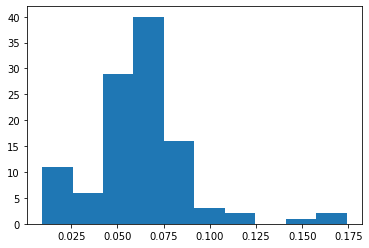

In [147]:
#чарт из средних весов по всем словам без ограничений на вес
plt.hist(b_sred)
plt.show()

In [157]:
#словарь с весами слов уже из наших статей
dict_weights1 = {}
for key in my_list.keys():
    for value in my_list[key]:
        rab_list = final['weightwords'][value]
        for tupl in rab_list:
            if tupl[0] == key and tupl[1] > 0.1:
                if final['date'][value] not in dict_weights1.keys():
                    dict_weights1[final['date'][value]]=list()
                    dict_weights1[final['date'][value]].append(tupl[1])
                else:
                    dict_weights1[final['date'][value]].append(tupl[1])
print(dict_weights1)

{'2014-01': [0.39075125751408946, 0.12518332599212287, 0.14342398973311887, 0.15143055359983568, 0.16130966798107335, 0.15995983286667287, 0.11783676864423458, 0.16441404669497348, 0.2689747095836573, 0.10334634404686749, 0.44376394840628686, 0.11241717313930254, 0.2696276466200825], '2014-06': [0.7974076500092553, 0.12595444575878445, 0.15416021173584973, 0.1170063335662135, 0.2874023678391955, 0.30837309622926923, 0.2894703549341195, 0.10061847289761343, 0.10031211262455397, 0.33713770389359293, 0.21737700910489563, 0.18165268221910047, 0.15659076483181666, 0.25650844809106393, 0.20324668842888233, 0.1266750682447257, 0.1679372329073738], '2015-05': [0.12293284379394427, 0.12061966611072808, 0.16567065646176748, 0.13708768444223007, 0.3450817163912512, 0.14061716725474177, 0.2984447854224453, 0.33164538632769397, 0.5367688502718028, 0.4551551709163346, 0.11578120407008877, 0.12221951054928076, 0.12398716855151158, 0.39324976638533643, 0.1277256921789832, 0.11729099570767386, 0.147257

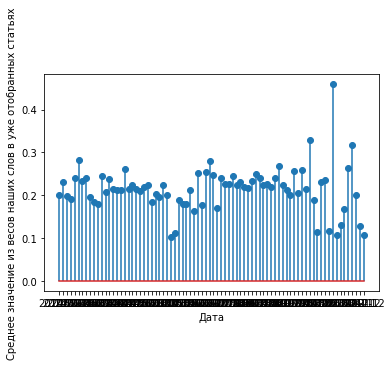

In [165]:
#sred_iz_nashich_statei = s_i_n_s
s_i_n_s = []
for month in dict_weights1.keys():
    a = np.array(dict_weights1[month])
    s_i_n_s.append(np.mean(a))
x = list(dict_weights1.keys())
y = s_i_n_s
plt.xlabel('Дата')
plt.ylabel('Среднее значение из весов наших слов в уже отобранных статьях')

plt.stem(x, y, use_line_collection=True)
plt.show()
# что получили: мы отобрали "предполагаемые статьи" и посчитали среднее значение
#из наших ключевых слов в них. В итоге получили что оно стабильно 0.2 - 0.25 что говорит о большой важности

In [162]:
sorted(nomera_nuzhnikh_stat)

[34, 61, 130, 132, 153, 228, 270, 351, 366, 392, 435, 475, 477, 512, 518, 538, 550, 663, 685, 698, 780, 781, 788, 809, 880, 951, 1009, 1035, 1070, 1071, 1132, 1144, 1190, 1214, 1221, 1357, 1398, 1411, 1420, 1431, 1442, 1514, 1622, 1651, 1667, 1701, 1754, 1764, 1789, 1807, 1815, 1897, 1899, 1901, 1962, 2034, 2054, 2133, 2154, 2179, 2248, 2333, 2349, 2374, 2412, 2426, 2481, 2509, 2546, 2569, 2584, 2738, 2804, 2872, 2945, 2946, 2948, 3037, 3077, 3161, 3296, 3326, 3353, 3368, 3407, 3443, 3461, 3508, 3541, 3577, 3593, 3594, 3650, 3725, 3735, 3765, 3793, 3856, 3867, 3894, 3897, 4031, 4057, 4108, 4165, 4171, 4247, 4263, 4290, 4351, 4357, 4387, 4444, 4456, 4478, 4531, 4623, 4644, 4645, 4662, 4666, 4676, 4790, 4800, 4856, 4860, 4864, 4921, 4948, 4963, 5010, 5063, 5075, 5111, 5193, 5209, 5267, 5281, 5379, 5539, 5557, 5592, 5616, 5710, 5821, 5833, 5881, 5952, 6005, 6054, 6094, 6096, 6171, 6248, 6391, 6395, 6402, 6424, 6458, 6503, 6529, 6565, 6632, 6633, 6643, 6866, 6878, 6889, 7080, 7161, 7277, 7

In [166]:
#список, в котором лайки наших статей
list_for_likes = []
for i in sorted(nomera_nuzhnikh_stat):
    list_for_likes.append(filik['votes'][i])


In [170]:
#список, который выдает среднее значение важных слов в нужных статьях
kl = [] 
for article in sorted(nomera_nuzhnikh_stat): 
    a = np.array(dict_dates_numbers[article]) 
    kl.append(np.mean(a)) 

[0.12518332599212287,
 0.12338516688999318,
 0.28681385687532135,
 0.1837418416409551,
 0.15995983286667287,
 0.11241717313930254,
 0.2696276466200825,
 0.105026323458521,
 0.20403925850324806,
 0.5237612001574864,
 0.1971143622681933,
 0.34953549384006727,
 0.10560135016166179,
 0.2261996224134228,
 0.10435984246390217,
 0.44128324032103267,
 0.1341717071353138,
 0.2823646248119134,
 0.16081275392909558,
 0.14179155199023466,
 0.15948062785914244,
 0.27620086443186825,
 0.3568519916065464,
 0.12113451212119326,
 0.17002546164319635,
 0.21193957639148622,
 0.23661467058571595,
 0.4070965398889985,
 0.21523362724819395,
 0.27285460513285703,
 0.14335448711668725,
 0.39884578880592986,
 0.1018023794199917,
 0.12230871427612394,
 0.1569203644973278,
 0.20713588256345067,
 0.5437964344114331,
 0.13089685921249994,
 0.10154034112463484,
 0.14953260322867798,
 0.179041937587219,
 0.13005000099265024,
 0.12522366241690205,
 0.12476221021502704,
 0.15046958395298732,
 0.2102002948548853,
 0.36

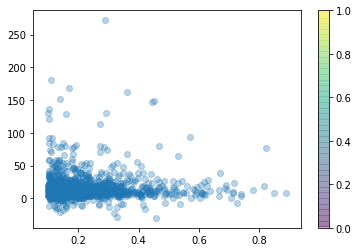

In [180]:
rng = np.random.RandomState(0)
x = kl
y = list_for_likes
colors = rng.rand(1315)

plt.scatter(x, y, cmap='viridis', alpha=0.3)

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,10), dpi= 80) 
sns.stripplot(kl, list_for_likes, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Типо скэттер плот', fontsize=22)
plt.xticks(kl)
plt.show()